## Install dependencies

First, we need to install the required dependencies for this project:

In [2]:
!pip install --no-deps git+https://github.com/autodistill/autodistill-grounded-sam-2


  Cloning https://github.com/autodistill/autodistill-grounded-sam-2 to /tmp/pip-req-build-gartusf1
  Running command git clone --filter=blob:none --quiet https://github.com/autodistill/autodistill-grounded-sam-2 /tmp/pip-req-build-gartusf1
  Resolved https://github.com/autodistill/autodistill-grounded-sam-2 to commit d6eebed1c9fda3cb0a1bf5aba3773467ce1deb54
  Preparing metadata (setup.py) ... done
  Created wheel for autodistill_grounded_sam_2: filename=autodistill_grounded_sam_2-0.1.0-py3-none-any.whl size=9008 sha256=505d761bc1bbf710ee92f794c72756cdcca6a99b8be6cf6e837b288e2d30e7e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-msnzei6i/wheels/42/e8/8f/f2db6a0d7ef0fa7e7e0c4a887abf7717eb74f8d013b9617c3a
Successfully built autodistill_grounded_sam_2


In [3]:
!pip list | grep autodistill


autodistill_grounded_sam_2               0.1.0


In [4]:
!pip install --no-deps git+https://github.com/autodistill/autodistill-grounded-sam-2


  Cloning https://github.com/autodistill/autodistill-grounded-sam-2 to /tmp/pip-req-build-bz7bws7j
  Running command git clone --filter=blob:none --quiet https://github.com/autodistill/autodistill-grounded-sam-2 /tmp/pip-req-build-bz7bws7j
  Resolved https://github.com/autodistill/autodistill-grounded-sam-2 to commit d6eebed1c9fda3cb0a1bf5aba3773467ce1deb54
  Preparing metadata (setup.py) ... done


In [5]:
!pip show autodistill-grounded-sam-2


Name: autodistill_grounded_sam_2
Version: 0.1.0
Summary: Use Segment Anything 2, grounded with Florence-2, to auto-label data for use in training vision models.
Home-page: https://github.com/autodistill/autodistill-grounded-sam-2
Author: Roboflow
Author-email: autodistill@roboflow.com
License: 
Location: /opt/conda/lib/python3.10/site-packages
Requires: autodistill, autodistill-florence-2, numpy, opencv-python, roboflow, supervision, torch
Required-by: 


In [6]:
!pip install autodistill


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 8.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autodistill-grounded-sam-2 0.1.0 requires autodistill-florence-2, which is not installed.
autodistill-grounded-sam-2 0.1.0 requires roboflow, which is not installed.


In [7]:
!pip install autodistill-florence-2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.2 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187315346 sha256=6ebfbdcbdd164f80278a954d29a1bc9d620130264215f0fb93374a6ab4e0a283
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash-attn


In [8]:
!pip install roboflow


In [9]:
!pip install supervision


In [10]:
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git


  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-h86kb3aw
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-h86kb3aw
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 856dde20aee659246248e20734ef9ba5214f5e44
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 9.8 MB/s eta 0:00:00:00:01
  Created wheel for groundingdino: filename=groundingdino-0.1.0-cp310-cp310-linux_x86_64.whl size=355130 sha256=9322e084c31d5a87d255c9629168a7390a388fbc309d49165d415395a9e77fe2
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxp19i4b/wheels/6b/06/d7/b57f601a4df56af41d262a5b1b496359b13c323bf5ef0434b2
Successfully built groundingdino


## Collect data

For this project, we need a folder of unlabeled images. We will label these images with Grounded SAM 2, then use them to train a model.

For this guide, we will use a dataset of shipping containers. We will use the dataset to train a model that can identify shipping containers.

## Load Grounded SAM 2

With a dataset ready, we can load Grounded SAM 2.

We need to provide an ontology for Grounded SAM 2. This refers to the objects that we want to identify, and the labels that we want to use in our dataset.

An ontology uses the following structure:

```
{"prompt": "label"}
```

For example, the following ontology will send the prompt "shipping container" to a model and save the results with the label "container":

```
{"shipping container": "container"}
```

In [11]:
from autodistill_grounded_sam_2 import GroundedSAM2

Cloning into 'segment-anything-2'...


Obtaining file:///root/.cache/autodistill/segment_anything_2/segment-anything-2
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata

Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.


In [12]:
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import numpy as np
import cv2
import os
import random
import supervision as sv

# define an ontology to map class names to our Grounded SAM 2 prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
# then, load the model
base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {
        "person": "person"
    }
    ),
    model = "Grounding DINO",
    grounding_dino_box_threshold=0.25
)

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3609.)


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Test the model

Now that we have loaded the model, we can test it on images. Let's test on random images in the `containers` directory we downloaded earlier. If you are using your own dataset, replace the value of `IMAGE_DIR` with the folder where your unlabeled images are stored.

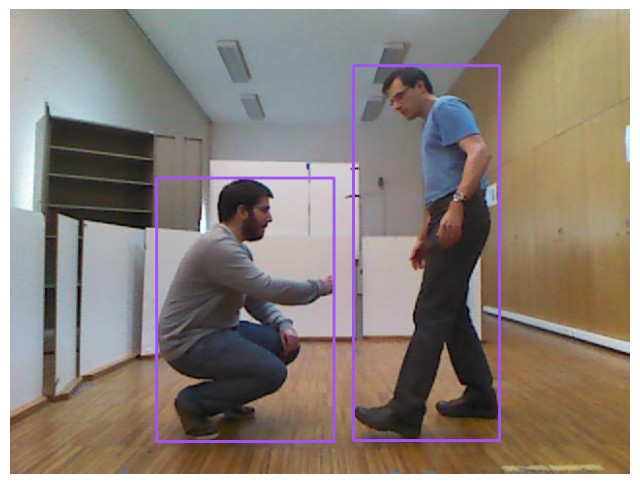

In [25]:
IMAGE_DIR = "/kaggle/input/dataset/2000dataset/train"
IMAGE_PATH = os.path.join(IMAGE_DIR, random.choice(os.listdir(IMAGE_DIR)))

results = base_model.predict(IMAGE_PATH).with_nms()
results = results[results.confidence > 0.3]

image = cv2.imread(IMAGE_PATH)

mask_annotator = sv.BoxAnnotator()

annotated_image = mask_annotator.annotate(
	image.copy(), detections=results
)

sv.plot_image(image=annotated_image, size=(8, 8))

If your prompt does not work well, update your ontology to use a new prompt.

It may take a few tries to find a prompt that works.

Note that Grounding DINO, on which Grounded SAM 2 depends for object identification, cannot identify all objects. If, after experimentation, you cannot get the model to identify objects of interest, this model may not be suited to your task.

## Label the dataset

Once you have found a prompt that works for your dataset, you can label your dataset like so:

In [28]:
output_folder = "/kaggle/working/train_labeled3"
base_model.label(IMAGE_DIR, extension="jpg", output_folder=output_folder)


Labeling /kaggle/input/dataset/2000dataset/train/00015_color_png.rf.28582207902b7f6a774f1331701f8ed9.jpg: 100%|██████████| 2550/2550 [31:36<00:00,  1.34it/s]   
Passing a `Dict[str, np.ndarray]` into `DetectionDataset` is deprecated and will be removed in `supervision-0.26.0`. Use a list of paths `List[str]` instead.


Labeled dataset created - ready for distillation.


In [26]:
# Replace with the path to a single image
single_image_path = "/kaggle/input/dataset/2000dataset/test/00000_color_png.rf.3a7378f6cecdbff5561bf0b064f0dafe.jpg"
base_model.label(single_image_path, output_folder=output_folder)


Labeling images: 0it [00:00, ?it/s]

Labeled dataset created - ready for distillation.



Passing a `Dict[str, np.ndarray]` into `DetectionDataset` is deprecated and will be removed in `supervision-0.26.0`. Use a list of paths `List[str]` instead.


With a labeled dataset ready, the next step is to inspect the quality of the labels and train your model. Roboflow has utilities for both of these steps. With Roboflow, you can review and amend annotations, then use your dataset to train a model.

[Create a free Roboflow account](https://roboflow.com), then create a new project in your Roboflow dashboard. Once you have a new project, you can upload your labeled data to the platform with the following code:

In [29]:
import roboflow

roboflow.login("owrx1LZjHtRJlYI9T1tP")

rf = roboflow.Roboflow()

workspace = rf.workspace("crowdcontrol")
workspace.upload_dataset(
    "/kaggle/working/train_labeled3",
    "crowd2-i09jf",
    project_license="MIT",
    project_type="object-detection",
)

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...
Uploading to existing project crowdcontrol/crowd2-i09jf
[UPLOADED] /kaggle/working/train_labeled3/train/images/00000_color_png.rf.14efa5ec5d7f21cd9ba53a023971def6.jpg (fKieyV7PH8hzaHqZduKi) [0.5s] / annotations = OK [0.5s]
[UPLOADED] /kaggle/working/train_labeled3/train/images/00000_color_png.rf.10ce753713ae9fdcbbb0461491b8736c.jpg (qX4zx7lQRpC8IUKCJRaQ) [0.5s] / annotations = OK [0.5s]
[UPLOADED] /kaggle/working/train_labeled3/train/images/00000_color_png.rf.1416971e640fdc2df566fcff95072005.jpg (EtRrjFWUb8fpthiIxmZh) [0.7s] / annotations = OK [0.5s]
[UPLOADED] /kaggle/working/train_labeled3/train/images/00000_color_png.rf.027ef7048d0c81f1018c0f96d5c7ac80.jpg (EvjJG1s5HIpUWiYkSb2e) [0.7s] / annotations = OK [0.6s]
[UPLOADED] /kaggle/working/train_labeled3/train/images/00000_color_png.rf.01ee11fe5d5cc9efabe5e211c42fa4ff.jpg (vgPzMqASgO

In [24]:
import shutil

# Create a zip file of the output directory
shutil.make_archive('/kaggle/working/train_labeled2', 'zip', '/kaggle/working/train_labeled2')

# Now you can download the zip file


'/kaggle/working/train_labeled2.zip'

Above, replace:

- `WORKSPACE_ID` with your workspace ID. [Learn how to find your workspace ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids)
- `PROJECT_ID` with the name of your project ID. [Learn how to find your project ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids)

Once you have run the code cell above, go back to your Roboflow project. Here, you can inspect the quality of all annotations and make the requisite changes

You can add, adjust, and remove polygons. To learn more about annotating with Roboflow and the features available, refer to the [Roboflow Annotate documentation](https://docs.roboflow.com/annotate/annotation-tools).

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.